# Benjamin Lavoie (benjaminlavoie02@gmail.com)

# CapStone project: Gaming Score Forecasting Model

# Last update: March 13th, 2024 (version 1.6)

## Introduction:

My capstone project is about video games sales and ratings prediction.

It has 3 main datapoints:
    1. Past game sales
    2. Past game ratings
    3. Game features, like the number of players, the genre, and more.
 

# Table of Contents

**[1. Part 1 - Inspecting and choosing datasets](#heading--1)**

  * [1.1 - Dataset VG_Sales_All2](#heading--1-1)

  * [1.2 - Dataset Video_Games](#heading--1-2)
  
  * [1.3 - Dataset metacritic_games_master](#heading--1-3)
    
  * [1.4 - Dataset Tagged-Data-Final](#heading--1-4)
  
  * [1.5 - Dataset Cleaned Data 2](#heading--1-5)
  
  * [1.6 - Dataset opencritic_rankings_feb_2023](#heading--1-6)
  
  * [1.7 - Dataset vgsales](#heading--1-7)
  
  * [1.8 - Dataset all_video_games(cleaned)](#heading--1-8)
  
  * [1.9 - Dataset Raw Data](#heading--1-9)
  

**[2. Part 2 - Cleaning and joining datasets](#heading--2)**

  * [2.1 - Merging the 4 main datasets](#heading--2-1)


## [Next Steps](#heading--3)


<div id="heading--1"/>
<br>

# Part 1 - Inspecting and choosing datasets 

<br>

I will start looking into the different datasets and making sure my main dataset is cleaned and
can be used properly.

In [232]:

# Necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import nltk
import statsmodels.api as sm

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# To plot
from scipy import stats
from scipy.stats import norm 

# To split the data as necessary for modelling
from sklearn.model_selection import train_test_split

# To process text data
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import string

# To get rid of logistic regression default solver warnings that appear if sklearn hasn't been updated
import warnings
warnings.filterwarnings('ignore')

# To "pickle" things, like accuracies or even an entire fitted model
import joblib

# To cross-validate
from sklearn.model_selection import cross_val_score

# To set up a temporary directory for caching pipeline results
from tempfile import mkdtemp

# To build a pipeline
from sklearn.pipeline import Pipeline

# To do dimensionality reduction
from sklearn.decomposition import PCA

# To do a cross-validated grid search
from sklearn.model_selection import GridSearchCV


# To see more columns at once, I'll change the display.max_columns number
pd.set_option('display.max_columns', 50)

In [153]:
# importing datasets, part 1

path = ''
all_files = glob.glob(os.path.join("../DataSets/*.csv"))

all_files

['../DataSets/Video_Games.csv',
 '../DataSets/metacritic_games_master.csv',
 '../DataSets/Tagged-Data-Final.csv',
 '../DataSets/Cleaned Data 2.csv',
 '../DataSets/opencritic_rankings_feb_2023.csv',
 '../DataSets/vgsales.csv',
 '../DataSets/all_video_games(cleaned).csv',
 '../DataSets/Raw Data.csv',
 '../DataSets/VG_Sales_All2.csv']

In [154]:
# importing datasets, part 2, and putting all the datasets into dataframes

df2 = pd.read_csv(all_files[0], index_col=None, header=0)
df3 = pd.read_csv(all_files[1], index_col=None, header=0)
df4 = pd.read_csv(all_files[2], index_col=None, header=0)
df5 = pd.read_csv(all_files[3], index_col=None, header=0)
df6 = pd.read_csv(all_files[4], index_col=None, header=0)
df7 = pd.read_csv(all_files[5], index_col=None, header=0)
df8 = pd.read_csv(all_files[6], index_col=None, header=0)
df9 = pd.read_csv(all_files[7], index_col=None, header=0)
df1 = pd.read_csv(all_files[8], index_col=None, header=0)

<div id="heading--1-1"/>
<br>

# 1.1 - Dataset VG_Sales_All2
<br>

In [155]:
# I will check the first dataset.

display(df1.head())
display(df1.sample(20))

,Rank,Name,Platform,Publisher,Developer,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales,Year,Genre,Platform_Brand,Platform_Type
0,30,Wii Sports,Wii,Nintendo,Nintendo EAD,41.36,29.02,3.77,8.51,82.65,2006.0,Sports,Nintendo,HomeConsole
1,53,Mario Kart 8 Deluxe,NS,Nintendo,Nintendo EPD,5.05,4.98,2.11,0.91,60.58,2017.0,Racing,Nintendo,HomeConsole
2,22606,Team Fortress 2,PC,Valve,Valve Corporation,NaN,0.00,NaN,0.00,50.10,2008.0,Shooter,PC,PC
3,81,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,NaN,NaN,NaN,NaN,46.00,2012.0,Shooter,PC,PC
4,75,Animal Crossing: New Horizons,NS,Nintendo,Nintendo,NaN,NaN,NaN,NaN,43.38,2020.0,Simulation,Nintendo,HomeConsole


,Rank,Name,Platform,Publisher,Developer,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales,Year,Genre,Platform_Brand,Platform_Type
38068,30227,Demon Sword,NES,Taito,Taito Corporation,NaN,NaN,NaN,NaN,0.00,1990.0,Action,Nintendo,HomeConsole
10661,12351,F1 2011,PSV,Codemasters,Codemasters,0.03,0.08,0.01,0.02,0.14,2012.0,Racing,Sony,Handheld
24386,54912,AeternoBlade,3DS,"Corecell Technology Co.,Ltd.","Corecell Technology Co.,Ltd.",NaN,NaN,NaN,NaN,0.00,2014.0,Adventure,Nintendo,Handheld
29761,51890,Tsuri Sensei 2,GB,J-Wing,J-Wing,NaN,NaN,NaN,NaN,0.00,1999.0,Sports,Nintendo,Handheld
40618,54626,A Plague Tale: Innocence,XS,Unknown,Asobo Studio,NaN,NaN,NaN,NaN,0.00,NaN,Action-Adventure,Microsoft,HomeConsole
7971,9538,Ultimate Band,Wii,Disney Interactive Studios,Fall Line Studio,0.19,0.03,NaN,0.02,0.24,2008.0,Misc,Nintendo,HomeConsole
45640,62808,The Walking Dead: 400 Days,XOne,Unknown,Telltale Games,NaN,NaN,NaN,NaN,0.00,NaN,Adventure,Microsoft,HomeConsole
3623,4849,NCAA Football 2005,XB,EA Sports,EA Tiburon,0.63,0.02,NaN,0.03,0.68,2004.0,Sports,Microsoft,HomeConsole
13619,15575,Infernal: Hell's Vengeance,X360,Playlogic Game Factory,Metropolis Software,0.06,0.01,NaN,0.01,0.08,2009.0,Shooter,Microsoft,HomeConsole
29460,28294,Chara-Chinko,DS,Interchannel,Interchannel,NaN,NaN,NaN,NaN,0.00,2009.0,Misc,Nintendo,Handheld


In [156]:
# quick checking of best selling games.

df1.sort_values('Global_Sales', ascending = False).head(40)

,Rank,Name,Platform,Publisher,Developer,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales,Year,Genre,Platform_Brand,Platform_Type
0,30,Wii Sports,Wii,Nintendo,Nintendo EAD,41.36,29.02,3.77,8.51,82.65,2006.0,Sports,Nintendo,HomeConsole
1,53,Mario Kart 8 Deluxe,NS,Nintendo,Nintendo EPD,5.05,4.98,2.11,0.91,60.58,2017.0,Racing,Nintendo,HomeConsole
2,22606,Team Fortress 2,PC,Valve,Valve Corporation,NaN,0.00,NaN,0.00,50.10,2008.0,Shooter,PC,PC
3,81,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,NaN,NaN,NaN,NaN,46.00,2012.0,Shooter,PC,PC
4,75,Animal Crossing: New Horizons,NS,Nintendo,Nintendo,NaN,NaN,NaN,NaN,43.38,2020.0,Simulation,Nintendo,HomeConsole
5,87,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,NaN,NaN,42.00,2017.0,Shooter,PC,PC
6,80,Super Mario Bros.,NES,Nintendo,Nintendo EAD,29.08,3.58,6.81,0.77,40.24,1985.0,Platform,Nintendo,HomeConsole
7,86,Mario Kart Wii,Wii,Nintendo,Nintendo EAD,15.91,12.92,3.80,3.35,35.98,2008.0,Racing,Nintendo,HomeConsole
8,97,Minecraft,PC,Mojang,Mojang AB,NaN,NaN,NaN,NaN,33.14,2010.0,Misc,PC,PC
9,98,Wii Sports Resort,Wii,Nintendo,Nintendo EAD,15.61,10.99,3.29,3.02,32.90,2009.0,Sports,Nintendo,HomeConsole


In [157]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48007 entries, 0 to 48006
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            48007 non-null  int64  
 1   Name            48007 non-null  object 
 2   Platform        48007 non-null  object 
 3   Publisher       48007 non-null  object 
 4   Developer       48007 non-null  object 
 5   NA_Sales        13487 non-null  float64
 6   PAL_Sales       13836 non-null  float64
 7   JP_Sales        7382 non-null   float64
 8   Other_Sales     16061 non-null  float64
 9   Global_Sales    48007 non-null  float64
 10  Year            41974 non-null  float64
 11  Genre           48007 non-null  object 
 12  Platform_Brand  48007 non-null  object 
 13  Platform_Type   48007 non-null  object 
dtypes: float64(6), int64(1), object(7)
memory usage: 5.1+ MB


In [158]:
# df1.dropna(subset=['Global_Sales'], inplace=True)

In [159]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48007 entries, 0 to 48006
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            48007 non-null  int64  
 1   Name            48007 non-null  object 
 2   Platform        48007 non-null  object 
 3   Publisher       48007 non-null  object 
 4   Developer       48007 non-null  object 
 5   NA_Sales        13487 non-null  float64
 6   PAL_Sales       13836 non-null  float64
 7   JP_Sales        7382 non-null   float64
 8   Other_Sales     16061 non-null  float64
 9   Global_Sales    48007 non-null  float64
 10  Year            41974 non-null  float64
 11  Genre           48007 non-null  object 
 12  Platform_Brand  48007 non-null  object 
 13  Platform_Type   48007 non-null  object 
dtypes: float64(6), int64(1), object(7)
memory usage: 5.1+ MB


This dataset will be my main dataset. It has a lot of info regarding sales and games. I will keep the following columns:

### Name: df1, video_games_sales:
 - name
 - genre (maybe)
 - platform
 - publisher
 - only the Global_Sales column (in millions)
 
<br>

I will drop the other columns as I don't think they will be useful for my model, either because I don't have neough data or because some info will be more complete in other datasets.

In [160]:
df1.drop(['Year', 'Rank', 'NA_Sales', 'PAL_Sales',
          'JP_Sales', 'Other_Sales'], axis=1, inplace=True)

In [161]:
# checking the df

df1

,Name,Platform,Publisher,Developer,Global_Sales,Genre,Platform_Brand,Platform_Type
0,Wii Sports,Wii,Nintendo,Nintendo EAD,82.65,Sports,Nintendo,HomeConsole
1,Mario Kart 8 Deluxe,NS,Nintendo,Nintendo EPD,60.58,Racing,Nintendo,HomeConsole
2,Team Fortress 2,PC,Valve,Valve Corporation,50.10,Shooter,PC,PC
3,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,46.00,Shooter,PC,PC
4,Animal Crossing: New Horizons,NS,Nintendo,Nintendo,43.38,Simulation,Nintendo,HomeConsole
...,...,...,...,...,...,...,...,...
48002,Bubble Safari,PC,Zynga,Zynga,0.00,Shooter,PC,PC
48003,CastleVille,PC,Zynga,Zynga,0.00,Simulation,PC,PC
48004,FarmVille (Facebook),PC,Zynga,Zynga,0.00,Simulation,PC,PC
48005,FrontierVille (Facebook),PC,Zynga,Zynga,0.00,Simulation,PC,PC


In [162]:
# last df check

df1.head(20)

,Name,Platform,Publisher,Developer,Global_Sales,Genre,Platform_Brand,Platform_Type
0,Wii Sports,Wii,Nintendo,Nintendo EAD,82.65,Sports,Nintendo,HomeConsole
1,Mario Kart 8 Deluxe,NS,Nintendo,Nintendo EPD,60.58,Racing,Nintendo,HomeConsole
2,Team Fortress 2,PC,Valve,Valve Corporation,50.10,Shooter,PC,PC
3,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,46.00,Shooter,PC,PC
4,Animal Crossing: New Horizons,NS,Nintendo,Nintendo,43.38,Simulation,Nintendo,HomeConsole
5,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,PUBG Corporation,PUBG Corporation,42.00,Shooter,PC,PC
6,Super Mario Bros.,NES,Nintendo,Nintendo EAD,40.24,Platform,Nintendo,HomeConsole
7,Mario Kart Wii,Wii,Nintendo,Nintendo EAD,35.98,Racing,Nintendo,HomeConsole
8,Minecraft,PC,Mojang,Mojang AB,33.14,Misc,PC,PC
9,Wii Sports Resort,Wii,Nintendo,Nintendo EAD,32.90,Sports,Nintendo,HomeConsole


<div id="heading--1-2"/>

# 1.2 - Dataset Video_Games
<br>

In [163]:
# checking the second df/dataset

display(df2.head())
display(df2.sample(20))

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
2084,The Bouncer,PS2,2000.0,Action,Sony Computer Entertainment,0.30,0.23,0.38,0.08,0.99,66.0,20.0,8,35.0,DreamFactory,T
6716,Porky's,2600,1982.0,Action,20th Century Fox Video Games,0.23,0.01,0.00,0.00,0.25,NaN,NaN,NaN,NaN,NaN,NaN
12746,Atari's Greatest Hits: Volume 2,DS,2011.0,Misc,Atari,0.05,0.00,0.00,0.00,0.06,NaN,NaN,NaN,NaN,NaN,NaN
6147,Hannah Montana: Spotlight World Tour,PS2,2008.0,Action,Disney Interactive Studios,0.12,0.02,0.00,0.14,0.28,NaN,NaN,tbd,NaN,Avalanche Software,E
12538,Song of the Deep,XOne,2016.0,Action,Insomniac Games,0.05,0.00,0.00,0.01,0.06,66.0,12.0,6.9,20.0,Insomniac Games,E
1089,"Monsters, Inc.",GBA,2001.0,Adventure,THQ,0.59,0.95,0.03,0.10,1.67,NaN,NaN,tbd,NaN,Artificial Mind and Movement,E
1081,Metroid Fusion,GBA,2002.0,Action,Nintendo,1.18,0.27,0.17,0.06,1.68,92.0,44.0,9.1,200.0,Nintendo,E
11723,Family Game Night 4: The Game Show,X360,2011.0,Misc,Electronic Arts,0.07,0.00,0.00,0.01,0.08,NaN,NaN,tbd,NaN,Electronic Arts,E
13134,Puyo Pop,GBA,2001.0,Puzzle,Sega,0.04,0.01,0.00,0.00,0.05,84.0,14.0,tbd,NaN,Sonic Team,E
9146,NBA ShootOut 2002,PS,2001.0,Sports,Sony Computer Entertainment,0.08,0.05,0.00,0.01,0.14,53.0,10.0,tbd,NaN,989 Sports,E


In [164]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


### name: df2, videogames:

I would keep like to keep rating or developer, but there are too many missing data. I won't keep anything from this dataset.

<div id="heading--1-3"/>

# 1.3 - Dataset metacritic_games_master
<br>

In [165]:
# checking the 3rd df/dataset

display(df3.head())
display(df3.sample(20))

,Unnamed: 0,title,release_date,genre,platforms,developer,esrb_rating,ESRBs,metascore,userscore,critic_reviews,user_reviews,num_players
0,113,Pushmo,2011-12-08,"Miscellaneous, Puzzle, Action, Puzzle, Action",3DS,Intelligent Systems,E,NaN,90,8.3,31,215.0,1 Player
1,163,The Legend of Zelda: Majora's Mask 3D,2015-02-13,"Fantasy, Action Adventure, Open-World",3DS,GREZZO,E10+,NaN,89,8.9,82,781.0,1 Player
2,279,The Legend of Zelda: Ocarina of Time 3D,2011-06-19,"Miscellaneous, Fantasy, Fantasy, Compilation, ...",3DS,GREZZO,E10+,Animated Blood Fantasy Violence Suggestive Themes,94,9.0,85,1780.0,1 Player
3,380,The Legend of Zelda: A Link Between Worlds,2013-11-22,"Action RPG, Role-Playing, Action Adventure, Ge...",3DS,Nintendo,E,NaN,91,9.0,81,1603.0,1 Player
4,417,Colors! 3D,2012-04-05,"Miscellaneous, General, General, Application",3DS,Collecting Smiles,E,NaN,89,7.5,15,66.0,1-2 Players


,Unnamed: 0,title,release_date,genre,platforms,developer,esrb_rating,ESRBs,metascore,userscore,critic_reviews,user_reviews,num_players
8699,17738,Dynasty Warriors: Gundam 2,2009-04-21,"Action, Beat-'Em-Up",PS2,Omega Force,T,Fantasy Violence Mild Language,52,6.8,8,12.0,1 Player
18987,14581,Dogos,2016-09-07,"Action, Shooter, Shoot-'Em-Up, Top-Down",XOne,INTERNET URL S.A.,E10+,NaN,63,NaN,7,NaN,1 Player
11091,8996,Stories: The Path of Destinies,2016-04-12,"Role-Playing, Action RPG",PS4,Spearhead Games,T,NaN,73,7.4,41,133.0,1 Player
5905,13257,Real Myst,2000-11-14,"Adventure, First-Person, Fantasy",PC,Cyan Worlds,E,NaN,66,7.8,15,41.0,1 Player
7844,6440,MLB Slugfest 20-03,2002-06-23,"Sports, Traditional, Baseball, Arcade",PS2,Midway,E,Comic Mischief Violence,77,7.8,25,5.0,1-2 Players
3294,3884,Ground Control II: Operation Exodus,2004-06-23,"Strategy, Real-Time, Sci-Fi, Sci-Fi, General, ...",PC,Massive Entertainment,T,Blood and Gore Language Violence,80,8.4,47,42.0,"1-8 Players, Up to 8 Players"
13662,5679,Story of Seasons: Friends of Mineral Town,2020-07-14,"Strategy, Management, Business / Tycoon",NS,Marvelous Inc.,E10+,NaN,77,8.1,49,63.0,1 Player
125,6818,Azure Striker Gunvolt,2014-08-29,"Action, Platformer, 2D",3DS,Inti Creates,E10+,NaN,77,8.1,20,81.0,1 Player
9487,9697,Wolfenstein,2009-08-18,"Action, Sports, Fighting, Fighting, Individual...",PS3,Yuke's,T,Blood Language Mild Suggestive Themes Violence,72,6.8,28,93.0,Up to 12 Players
15421,5276,Scram Kitty and His Buddy on Rails,2014-05-15,"General, Action, General",WiiU,Dakko Dakko,E,NaN,79,7.7,25,40.0,1 Player


In [166]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19315 entries, 0 to 19314
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      19315 non-null  int64  
 1   title           19315 non-null  object 
 2   release_date    19315 non-null  object 
 3   genre           19315 non-null  object 
 4   platforms       19314 non-null  object 
 5   developer       19296 non-null  object 
 6   esrb_rating     17200 non-null  object 
 7   ESRBs           7855 non-null   object 
 8   metascore       19315 non-null  int64  
 9   userscore       17951 non-null  float64
 10  critic_reviews  19315 non-null  int64  
 11  user_reviews    17951 non-null  float64
 12  num_players     19302 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 1.9+ MB


In [167]:
df3.describe()

,Unnamed: 0,metascore,userscore,critic_reviews,user_reviews
count,19315.000000,19315.000000,17951.000000,19315.000000,17951.000000
mean,9657.852343,70.627958,6.979294,22.940305,204.717286
std,5576.757904,12.248037,1.353780,17.324113,1431.254477
min,0.000000,11.000000,0.300000,6.000000,4.000000
25%,4828.500000,64.000000,6.300000,10.000000,14.000000
50%,9658.000000,72.000000,7.300000,17.000000,34.000000
75%,14487.500000,79.000000,7.900000,30.000000,105.000000
max,19317.000000,99.000000,9.700000,127.000000,158410.000000


This dataset is the main dataset related to the target.
Since the target will be related to the metascore, this dataset will be my main dataset related to that.

I will keep those columns:

### name: df3, metacritic_games_master
 - release date
 - developer (some missing values, still useful)
 - esrb_rating (some missing values, still useful)
 - metascore
 - userscore
 - critic_reviews
 - user_reviews
 - num_players (some missing values, still useful)

In [168]:
# dropping the unnecessary columns

df3.drop(['Unnamed: 0', 'genre', 'ESRBs'], axis=1, inplace=True)

In [169]:
# Also, I'll change release_date column into datetime

df3['release_date'] = pd.to_datetime(df3['release_date'])

In [170]:
df3['release_day'] = df3['release_date'].dt.day
df3['release_month'] = df3['release_date'].dt.month
df3['release_year'] = df3['release_date'].dt.year

df3.drop(['release_date'], axis=1, inplace=True)

In [171]:
# last check of the df

df3

,title,platforms,developer,esrb_rating,metascore,userscore,critic_reviews,user_reviews,num_players,release_day,release_month,release_year
0,Pushmo,3DS,Intelligent Systems,E,90,8.3,31,215.0,1 Player,8,12,2011
1,The Legend of Zelda: Majora's Mask 3D,3DS,GREZZO,E10+,89,8.9,82,781.0,1 Player,13,2,2015
2,The Legend of Zelda: Ocarina of Time 3D,3DS,GREZZO,E10+,94,9.0,85,1780.0,1 Player,19,6,2011
3,The Legend of Zelda: A Link Between Worlds,3DS,Nintendo,E,91,9.0,81,1603.0,1 Player,22,11,2013
4,Colors! 3D,3DS,Collecting Smiles,E,89,7.5,15,66.0,1-2 Players,5,4,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
19310,Necromunda: Hired Gun,XS,Focus Home Interactive,M,56,5.3,11,10.0,1 Player,1,6,2021
19311,Grand Theft Auto: The Trilogy - The Definitive...,XS,"Rockstar Games, Grove Street Games",M,56,0.7,11,1124.0,1 Player,11,11,2021
19312,Bright Memory,XS,FYQD Personal Studio,NaN,55,4.2,31,62.0,1 Player,10,11,2020
19313,Balan Wonderworld,XS,"Square Enix, Arzest, Balan Company",E10+,47,7.2,11,162.0,No Online Multiplayer Online Multiplayer,26,3,2021


<div id="heading--1-4"/>
<br>

# 1.4 - Dataset Tagged-Data-Final
<br>

In [172]:
# checking the 4th df/dataset

display(df4.head())
display(df4.sample(20))

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Story Focus,Gameplay Focus,Series
0,.hack//Infection Part 1,2002,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.27,75,35,8.5,60,CyberConnect2,T,1,0,1
1,.hack//Mutation Part 2,2002,Role-Playing,Atari,0.23,0.18,0.20,0.06,0.68,76,24,8.9,81,CyberConnect2,T,1,0,1
2,.hack//Outbreak Part 3,2002,Role-Playing,Atari,0.14,0.11,0.17,0.04,0.46,70,23,8.7,19,CyberConnect2,T,1,0,1
3,[Prototype],2009,Action,Activision,0.84,0.35,0.00,0.12,1.31,78,83,7.8,356,Radical Entertainment,M,0,1,1
4,[Prototype],2009,Action,Activision,0.65,0.40,0.00,0.19,1.24,79,53,7.7,308,Radical Entertainment,M,0,1,1


,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Story Focus,Gameplay Focus,Series
4238,Percy Jackson and the Olympians: The Lightning...,2010,Role-Playing,Activision,0.22,0.01,0.00,0.02,0.24,56,6,6.9,12,Griptonite Games,E10+,0,1,0
3988,NFL Blitz Pro,2003,Sports,Midway Games,0.11,0.09,0.00,0.03,0.23,73,20,8.5,14,Midway,E,0,1,0
5784,The Godfather,2006,Action,Electronic Arts,0.89,0.03,0.01,0.15,1.09,75,56,8.3,99,Electronic Arts,M,1,1,1
6811,XGRA: Extreme G Racing Association,2003,Racing,Acclaim Entertainment,0.02,0.00,0.00,0.00,0.02,69,13,7.0,5,Acclaim Studios Cheltenham,T,0,1,0
928,Colony Wars,1997,Simulation,Psygnosis,0.24,0.16,0.00,0.03,0.42,91,12,7.8,12,Psygnosis,E,0,1,0
6486,Valhalla Knights 2,2008,Role-Playing,Rising Star Games,0.09,0.00,0.12,0.01,0.23,50,13,5.4,13,K2,E10+,1,0,0
4652,Resident Evil Archives: Resident Evil,2008,Action,Capcom,0.16,0.04,0.08,0.02,0.30,76,11,8.9,41,Capcom,M,1,1,1
5781,The First Templar,2011,Action,Kalypso Media,0.06,0.01,0.00,0.01,0.08,57,19,5.8,60,Haemimont,T,0,1,0
5898,The Lord of the Rings: The Third Age,2004,Role-Playing,Electronic Arts,0.22,0.06,0.00,0.01,0.29,74,25,7.8,19,EA Games,T,0,1,0
2258,Grand Theft Auto V,2014,Action,Take-Two Interactive,2.81,2.19,0.00,0.47,5.48,97,14,7.9,764,Rockstar North,M,1,1,0


In [173]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6894 entries, 0 to 6893
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6894 non-null   object 
 1   Year_of_Release  6894 non-null   int64  
 2   Genre            6894 non-null   object 
 3   Publisher        6893 non-null   object 
 4   NA_Sales         6894 non-null   float64
 5   EU_Sales         6894 non-null   float64
 6   JP_Sales         6894 non-null   float64
 7   Other_Sales      6894 non-null   float64
 8   Global_Sales     6894 non-null   float64
 9   Critic_Score     6894 non-null   int64  
 10  Critic_Count     6894 non-null   int64  
 11  User_Score       6894 non-null   float64
 12  User_Count       6894 non-null   int64  
 13  Developer        6890 non-null   object 
 14  Rating           6826 non-null   object 
 15  Story Focus      6894 non-null   int64  
 16  Gameplay Focus   6894 non-null   int64  
 17  Series        

In [174]:
df4.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Story Focus,Gameplay Focus,Series
count,6894.000000,6894.000000,6894.000000,6894.000000,6894.00000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000
mean,2007.482303,0.390920,0.234517,0.063867,0.08200,0.771487,70.258486,28.842472,7.184378,174.392370,0.111256,0.955323,0.114737
std,4.236401,0.963231,0.684214,0.286461,0.26862,1.954780,13.861082,19.194572,1.439806,584.872155,0.314472,0.206608,0.318728
min,1985.000000,0.000000,0.000000,0.000000,0.00000,0.010000,13.000000,3.000000,0.500000,4.000000,0.000000,0.000000,0.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.01000,0.110000,62.000000,14.000000,6.500000,11.000000,0.000000,1.000000,0.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.02000,0.290000,72.000000,24.000000,7.500000,27.000000,0.000000,1.000000,0.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.07000,0.750000,80.000000,39.000000,8.200000,89.000000,0.000000,1.000000,0.000000
max,2016.000000,41.360000,28.960000,6.500000,10.57000,82.530000,98.000000,113.000000,9.600000,10665.000000,1.000000,1.000000,1.000000


This dataset has 3 interesting columns and I will keep them.

### df4, Tagged-Data-Final
 - Storyfocus/gameplay focus (very interesting)
 - Series (if the game is part of a series)

In [175]:
# dropping the unnecessary columns

df4.drop(['Year_of_Release', 'Publisher', 'Genre', 'NA_Sales', 'EU_Sales',
          'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
         'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'], axis=1, inplace=True)

For the null values, I will replace the NaN by zeroes

The NaN values in those 3 columns only mean that the games are not part of a series.
As for story/gameplay-focused, we will see what we do later.

In [176]:
# replacing NaNs by zeroes

df4.fillna(0, inplace=True)

In [177]:
# verifying that games are indeed more than once if they were released on more than 1 console

df4.loc[df4['Name'] == 'Grand Theft Auto V']

,Name,Story Focus,Gameplay Focus,Series
2255,Grand Theft Auto V,1,1,0
2256,Grand Theft Auto V,1,1,0
2257,Grand Theft Auto V,1,1,0
2258,Grand Theft Auto V,1,1,0
2259,Grand Theft Auto V,1,1,0


In [178]:
# remove duplicates because I won't need them

df4.drop_duplicates(inplace=True)

In [179]:
# making sure that there are no more duplicated rows

df4.duplicated().sum()

0

In [180]:
# checking the df one last time

df4

,Name,Story Focus,Gameplay Focus,Series
0,.hack//Infection Part 1,1,0,1
1,.hack//Mutation Part 2,1,0,1
2,.hack//Outbreak Part 3,1,0,1
3,[Prototype],0,1,1
5,[Prototype 2],0,1,1
...,...,...,...,...
6889,Zubo,0,1,0
6890,Zumba Fitness,0,1,0
6891,Zumba Fitness: World Party,0,1,0
6892,Zumba Fitness Core,0,1,0


<div id="heading--1-5"/>
<br>

# 1.5 - Dataset Cleaned Data 2
<br>

In [181]:
# checking the 5th df/dataset

display(df5.head())
display(df5.sample(20))

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,.hack//Infection Part 1,2002,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.27,75,35,8.5,60,CyberConnect2,T
1,.hack//Mutation Part 2,2002,Role-Playing,Atari,0.23,0.18,0.20,0.06,0.68,76,24,8.9,81,CyberConnect2,T
2,.hack//Outbreak Part 3,2002,Role-Playing,Atari,0.14,0.11,0.17,0.04,0.46,70,23,8.7,19,CyberConnect2,T
3,[Prototype],2009,Action,Activision,0.84,0.35,0.00,0.12,1.31,78,83,7.8,356,Radical Entertainment,M
4,[Prototype],2009,Action,Activision,0.65,0.40,0.00,0.19,1.24,79,53,7.7,308,Radical Entertainment,M


,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
6074,Tiger Woods PGA Tour 06,2005,Sports,Electronic Arts,0.28,0.00,0.00,0.02,0.31,71,36,7.4,8,EA Sports,E
1282,Digimon World 2,2000,Role-Playing,Namco Bandai Games,0.23,0.16,0.16,0.04,0.58,42,5,7.6,47,Bandai,E
4869,SAW,2009,Action,Konami Digital Entertainment,0.13,0.12,0.00,0.03,0.28,59,39,7.4,50,Zombie Studios,M
2965,LEGO The Lord of the Rings,2012,Action,Warner Bros. Interactive Entertainment,0.64,0.49,0.00,0.11,1.23,80,49,8.5,73,TT Games,E10+
3881,NCAA Football 2005,2004,Sports,Electronic Arts,0.63,0.02,0.00,0.03,0.68,89,29,8.0,12,EA Sports,E
1292,Dino Stalker,2002,Shooter,Capcom,0.07,0.06,0.08,0.02,0.22,50,18,6.3,8,Capcom,M
4042,NHL 2003,2002,Sports,Electronic Arts,0.10,0.03,0.00,0.00,0.13,79,13,6.3,4,EA Sports,E
4311,Plants vs. Zombies,2010,Strategy,PopCap Games,0.24,0.00,0.00,0.02,0.26,89,27,8.2,160,PopCap,E10+
2579,IL-2 Sturmovik: Birds of Prey,2009,Simulation,505 Games,0.34,0.25,0.00,0.10,0.68,81,28,7.3,20,Gaijin Entertainment,T
3818,NBA Live 16,2015,Sports,Electronic Arts,0.10,0.04,0.00,0.03,0.18,59,27,6.1,70,EA Sports,E


In [182]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6894 entries, 0 to 6893
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6894 non-null   object 
 1   Year_of_Release  6894 non-null   int64  
 2   Genre            6894 non-null   object 
 3   Publisher        6893 non-null   object 
 4   NA_Sales         6894 non-null   float64
 5   EU_Sales         6894 non-null   float64
 6   JP_Sales         6894 non-null   float64
 7   Other_Sales      6894 non-null   float64
 8   Global_Sales     6894 non-null   float64
 9   Critic_Score     6894 non-null   int64  
 10  Critic_Count     6894 non-null   int64  
 11  User_Score       6894 non-null   float64
 12  User_Count       6894 non-null   int64  
 13  Developer        6890 non-null   object 
 14  Rating           6826 non-null   object 
dtypes: float64(6), int64(4), object(5)
memory usage: 808.0+ KB


In [183]:
df5.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6894.000000,6894.000000,6894.000000,6894.000000,6894.00000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000
mean,2007.482303,0.390920,0.234517,0.063867,0.08200,0.771487,70.258486,28.842472,7.184378,174.392370
std,4.236401,0.963231,0.684214,0.286461,0.26862,1.954780,13.861082,19.194572,1.439806,584.872155
min,1985.000000,0.000000,0.000000,0.000000,0.00000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.01000,0.110000,62.000000,14.000000,6.500000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.02000,0.290000,72.000000,24.000000,7.500000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.07000,0.750000,80.000000,39.000000,8.200000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.57000,82.530000,98.000000,113.000000,9.600000,10665.000000


### name: df5, Cleaned Data 2

No columns are useful as of now.

<div id="heading--1-6"/>
<br>

# 1.6 - Dataset opencritic_rankings_feb_2023
<br>

In [184]:
# checking the 6th df/dataset

display(df6.head())
display(df6.sample(20))

,title,score,opencritic_classification,platforms,release_date,url
0,Super Mario Odyssey,97.0,Mighty,Switch,27-Oct-17,https://opencritic.com/game/4504/super-mario-o...
1,The Legend of Zelda: Breath of the Wild,96.0,Mighty,"Wii-U, Switch",03-Mar-17,https://opencritic.com/game/1548/the-legend-of...
2,Red Dead Redemption 2,96.0,Mighty,"PS4, XB1, Stadia, PC, XBXS, PS5",26-Oct-18,https://opencritic.com/game/3717/red-dead-rede...
3,Elden Ring,95.0,Mighty,"PC, XBXS, PS5, XB1, PS4",25-Feb-22,https://opencritic.com/game/12090/elden-ring
4,Metroid Prime Remastered,95.0,Mighty,Switch,08-Feb-23,https://opencritic.com/game/14280/metroid-prim...


,title,score,opencritic_classification,platforms,release_date,url
6792,Werewolf: The Apocalypse - Earthblood,53.0,Weak,"PC, XB1, PS5, PS4, XBXS",04-Feb-21,https://opencritic.com/game/10839/werewolf-the...
9576,Pizza Parking,NaN,NaN,Switch,07-Feb-19,https://opencritic.com/game/7473/pizza-parking
5278,Blade Ballet,66.0,Fair,"PS4, PC, PS5",09-Aug-16,https://opencritic.com/game/3103/blade-ballet
4365,Project CARS 3,70.0,Fair,"PS4, XB1, PC, XBXS, PS5",25-Aug-20,https://opencritic.com/game/10044/project-cars-3
2956,BPM: Bullets Per Minute,75.0,Strong,"PC, PS4, XB1, XBXS, PS5",15-Sep-20,https://opencritic.com/game/10158/bpm-bullets-...
9355,Marenian Tavern Story: Patty and the Hungry God,NaN,NaN,"PS4, Switch, PS5",27-Nov-18,https://opencritic.com/game/6973/marenian-tave...
11196,Forward to the Sky,NaN,NaN,"PC, Switch",30-Jan-15,https://opencritic.com/game/10983/forward-to-t...
9370,Resynth,NaN,NaN,PC,27-Sep-18,https://opencritic.com/game/7001/resynth
544,World of Warcraft: Dragonflight,84.0,Mighty,PC,28-Nov-22,https://opencritic.com/game/14061/world-of-war...
12971,Devil Devour Alive DX,NaN,NaN,PC,25-Oct-22,https://opencritic.com/game/14140/devil-devour...


In [185]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13111 entries, 0 to 13110
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      13110 non-null  object 
 1   score                      7318 non-null   float64
 2   opencritic_classification  7318 non-null   object 
 3   platforms                  13111 non-null  object 
 4   release_date               13111 non-null  object 
 5   url                        13111 non-null  object 
dtypes: float64(1), object(5)
memory usage: 614.7+ KB


In [186]:
df6.describe()

,score
count,7318.000000
mean,70.594288
std,11.198340
min,15.000000
25%,65.000000
50%,72.000000
75%,78.000000
max,97.000000


### name: df6, opencritic_rankings_feb_2023
I will keep the columns related to OpenCritic
 - score
 - opencritic classification

In [187]:
# dropping the unnecessary columns

df6.drop(['release_date', 'url', 'platforms'], axis=1, inplace=True)

In [188]:
# change "score" column to numeric

df6['score'] = pd.to_numeric(df6['score'])

In [189]:
# checking the df

df6

,title,score,opencritic_classification
0,Super Mario Odyssey,97.0,Mighty
1,The Legend of Zelda: Breath of the Wild,96.0,Mighty
2,Red Dead Redemption 2,96.0,Mighty
3,Elden Ring,95.0,Mighty
4,Metroid Prime Remastered,95.0,Mighty
...,...,...,...
13106,The Settlers: New Allies,NaN,NaN
13107,Chef Life: A Restaurant Simulator,NaN,NaN
13108,Aces & Adventures,NaN,NaN
13109,Planet Cube: Edge,NaN,NaN


<div id="heading--1-7"/>
<br>

# 1.7 - Dataset vgsales
<br>

In [190]:
# checking the 7th df/dataset

display(df7.head())
display(df7.sample(20))

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
3549,3551,RalliSport Challenge,XB,2002.0,Racing,Microsoft Game Studios,0.39,0.16,0.00,0.02,0.57
2943,2945,X-Men Origins: Wolverine - Uncaged Edition,X360,2009.0,Action,Activision,0.42,0.21,0.00,0.06,0.69
8147,8149,Fireblade,PS2,2002.0,Action,Midway Games,0.09,0.07,0.00,0.02,0.18
185,186,FIFA Soccer 13,X360,2012.0,Action,Electronic Arts,1.08,3.48,0.03,0.58,5.18
11004,11006,Quiz Magic Academy DS: Futatsu no Jikuu Koku,DS,2010.0,Misc,Konami Digital Entertainment,0.00,0.00,0.09,0.00,0.09
7197,7199,Tony Hawk's Downhill Jam,DS,2006.0,Sports,Activision,0.20,0.00,0.00,0.02,0.22
13788,13790,Who Wants to be a Millionaire: 1st Edition,DS,2007.0,Misc,Ubisoft,0.00,0.04,0.00,0.00,0.04
9291,9293,NBA Jam,XB,2003.0,Sports,Acclaim Entertainment,0.10,0.03,0.00,0.00,0.14
1642,1644,NBA Live 99,PS,1997.0,Sports,Electronic Arts,1.13,0.05,0.00,0.03,1.22
12376,12378,Di-Gata Defenders,DS,2008.0,Role-Playing,Game Factory,0.06,0.00,0.00,0.00,0.06


In [191]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


After verification, the 7th dataset/df is the same as the 1st one.

Not useful.

<div id="heading--1-8"/>
<br>

# 1.8 - Dataset all video games (cleaned)
<br>

In [192]:
# checking the 8th dataset/df

display(df8.head())
display(df8.sample(20))

,Title,Release Date,Developer,Publisher,Genres,Genres Splitted,Product Rating,User Score,User Ratings Count,Platforms Info
0,Ziggurat (2012),2/17/2012,Action Button Entertainment,Freshuu Inc.,Action,['Action'],NaN,6.9,14.0,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform M..."
1,4X4 EVO 2,11/15/2001,Terminal Reality,Gathering,Auto Racing Sim,"['Auto', 'Racing', 'Sim']",Rated E For Everyone,NaN,NaN,"[{'Platform': 'Xbox', 'Platform Metascore': '5..."
2,MotoGP 2 (2001),1/22/2002,Namco,Namco,Auto Racing Sim,"['Auto', 'Racing', 'Sim']",Rated E For Everyone,5.8,NaN,"[{'Platform': 'PlayStation 2', 'Platform Metas..."
3,Gothic 3,11/14/2006,Piranha Bytes,Aspyr,Western RPG,"['Western', 'RPG']",Rated T For Teen,7.5,832.0,"[{'Platform': 'PC', 'Platform Metascore': '63'..."
4,Siege Survival: Gloria Victis,5/18/2021,FishTankStudio,Black Eye Games,RPG,['RPG'],NaN,6.5,10.0,"[{'Platform': 'PC', 'Platform Metascore': '69'..."


,Title,Release Date,Developer,Publisher,Genres,Genres Splitted,Product Rating,User Score,User Ratings Count,Platforms Info
7691,Spore,9/7/2008,Maxis,EA Games,Strategy,['Strategy'],Rated E +10 For Everyone +10,7.4,952.0,"[{'Platform': 'PC', 'Platform Metascore': '84'..."
11028,Heritage of Kings: The Settlers,2/24/2005,Blue Byte,Ubisoft,Management,['Management'],Rated T For Teen,7.0,40.0,"[{'Platform': 'PC', 'Platform Metascore': '58'..."
6092,Ys: The Oath in Felghana,11/1/2010,Falcom,XSEED Games,Action RPG,"['Action', 'RPG']",Rated T For Teen,8.1,90.0,"[{'Platform': 'PC', 'Platform Metascore': '73'..."
702,88 Heroes,3/24/2017,Bitmap Bureau,Rising Star Games,2D Platformer,"['2D', 'Platformer']",Rated E +10 For Everyone +10,5.8,5.0,"[{'Platform': 'PC', 'Platform Metascore': 'tbd..."
637,Chernobylite,7/28/2021,The Farm 51,All in! Games,Survival,['Survival'],NaN,7.9,212.0,"[{'Platform': 'PC', 'Platform Metascore': '75'..."
3379,Bayonetta 2,10/24/2014,PlatinumGames,Nintendo,Linear Action Adventure,"['Linear', 'Action', 'Adventure']",Rated M For Mature,8.9,1408.0,"[{'Platform': 'Wii U', 'Platform Metascore': '..."
3581,LEGO Marvel's Avengers,1/26/2016,TT Games,Warner Bros. Interactive Entertainment,Action Adventure,"['Action', 'Adventure']",Rated E +10 For Everyone +10,7.2,184.0,"[{'Platform': 'Xbox One', 'Platform Metascore'..."
10866,Resident Evil: Revelations 2 - Episode 3: Judg...,3/10/2015,Capcom,Capcom,Survival,['Survival'],Rated M For Mature,7.0,56.0,"[{'Platform': 'Xbox One', 'Platform Metascore'..."
1868,Total War: Rome Remastered,4/29/2021,Feral Interactive,Sega,Real-Time Strategy,"['Real-Time', 'Strategy']",Rated T For Teen,5.6,49.0,"[{'Platform': 'PC', 'Platform Metascore': '75'..."
1128,Combat Elite: WWII Paratroopers,11/21/2005,BattleBorne,SouthPeak Games,Third Person Shooter,"['Third', 'Person', 'Shooter']",Rated T For Teen,6.8,NaN,"[{'Platform': 'PlayStation 2', 'Platform Metas..."


In [193]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14055 entries, 0 to 14054
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               14034 non-null  object 
 1   Release Date        13991 non-null  object 
 2   Developer           13917 non-null  object 
 3   Publisher           13917 non-null  object 
 4   Genres              14034 non-null  object 
 5   Genres Splitted     14034 non-null  object 
 6   Product Rating      11005 non-null  object 
 7   User Score          11714 non-null  float64
 8   User Ratings Count  11299 non-null  float64
 9   Platforms Info      14055 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.1+ MB


### name: df8, all_video_games(cleaned)
 - developer (not missing too many) (to confirm)
 - genres/genres splitted

df8: not sure yet if I keep it.

<div id="heading--1-9"/>
<br>

# 1.9 - Dataset Raw Data
<br>

In [194]:
# checking the 9th df/dataset

display(df9.head())
display(df9.sample(20))

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
13435,Atelier Ayesha: The Alchemist of Dusk,PSV,2014.0,Role-Playing,Tecmo Koei,0.00,0.00,0.05,0.00,0.05,NaN,NaN,NaN,NaN,NaN,NaN
1515,Assassin's Creed Syndicate,XOne,2015.0,Action,Ubisoft,0.62,0.56,0.00,0.11,1.30,78.0,22.0,6.1,402.0,Ubisoft Quebec,M
14557,Pop'n Music 14 Fever!,PS2,2007.0,Misc,Konami Digital Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN
4975,Shin Megami Tensei: Devil Survivor Overclocked,3DS,2011.0,Role-Playing,Ghostlight,0.28,0.01,0.06,0.03,0.38,78.0,27.0,8.2,97.0,Atlus,T
5587,Naruto: Ultimate Ninja (JP sales),PS2,2003.0,Fighting,Atari,0.00,0.00,0.32,0.00,0.32,NaN,NaN,NaN,NaN,NaN,NaN
12075,Guilty Gear Xrd -Revelator-,PS3,2016.0,Fighting,PQube,0.02,0.02,0.03,0.01,0.07,NaN,NaN,NaN,NaN,NaN,NaN
3381,FIFA 15,PSV,2014.0,Sports,Electronic Arts,0.08,0.35,0.05,0.12,0.59,NaN,NaN,3.1,42.0,EA Sports,E
13795,Haikyu!! Cross Team Match!,3DS,2016.0,Adventure,Namco Bandai Games,0.00,0.00,0.04,0.00,0.04,NaN,NaN,NaN,NaN,NaN,NaN
7331,Robotech: The Macross Saga,GBA,2002.0,Shooter,TDK Mediactive,0.15,0.06,0.00,0.00,0.21,61.0,8.0,6.5,4.0,Lucky Chicken,E
13713,Dark Half,SNES,1996.0,Role-Playing,Enix Corporation,0.00,0.00,0.04,0.00,0.04,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


After verification, the df9 is same database as df2, but not cleaned. I will use df2 and not df9

<br>

# Some last verifications before merging
<br>


In [196]:
# checking if all different platforms are different values and different rows

df1.loc[df1['Name'] == 'Grand Theft Auto V']

,Name,Platform,Publisher,Developer,Global_Sales,Genre,Platform_Brand,Platform_Type
35,Grand Theft Auto V,PS3,Rockstar Games,Rockstar North,20.32,Action,Sony,HomeConsole
39,Grand Theft Auto V,PS4,Rockstar Games,Rockstar North,20.00,Action,Sony,HomeConsole
54,Grand Theft Auto V,X360,Rockstar Games,Rockstar North,15.86,Action,Microsoft,HomeConsole
90,Grand Theft Auto V,PC,Rockstar Games,Rockstar North,12.60,Action,PC,PC
147,Grand Theft Auto V,XOne,Rockstar Games,Rockstar North,8.72,Action,Microsoft,HomeConsole
35393,Grand Theft Auto V,PS5,Rockstar Games,Rockstar Games,0.00,Action-Adventure,Sony,HomeConsole
35394,Grand Theft Auto V,XS,Rockstar Games,Rockstar Games,0.00,Action-Adventure,Microsoft,HomeConsole


In [197]:
# renaming a column for easier merging

df3 = df3.rename({'title': 'name'}, axis=1)

In [198]:
# verification that the name change worked

df3

,name,platforms,developer,esrb_rating,metascore,userscore,critic_reviews,user_reviews,num_players,release_day,release_month,release_year
0,Pushmo,3DS,Intelligent Systems,E,90,8.3,31,215.0,1 Player,8,12,2011
1,The Legend of Zelda: Majora's Mask 3D,3DS,GREZZO,E10+,89,8.9,82,781.0,1 Player,13,2,2015
2,The Legend of Zelda: Ocarina of Time 3D,3DS,GREZZO,E10+,94,9.0,85,1780.0,1 Player,19,6,2011
3,The Legend of Zelda: A Link Between Worlds,3DS,Nintendo,E,91,9.0,81,1603.0,1 Player,22,11,2013
4,Colors! 3D,3DS,Collecting Smiles,E,89,7.5,15,66.0,1-2 Players,5,4,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
19310,Necromunda: Hired Gun,XS,Focus Home Interactive,M,56,5.3,11,10.0,1 Player,1,6,2021
19311,Grand Theft Auto: The Trilogy - The Definitive...,XS,"Rockstar Games, Grove Street Games",M,56,0.7,11,1124.0,1 Player,11,11,2021
19312,Bright Memory,XS,FYQD Personal Studio,NaN,55,4.2,31,62.0,1 Player,10,11,2020
19313,Balan Wonderworld,XS,"Square Enix, Arzest, Balan Company",E10+,47,7.2,11,162.0,No Online Multiplayer Online Multiplayer,26,3,2021


Now that all the datasets that I want to use has been cleaned for easy merging, it's time to do it.

<div id="heading--2"/>
<br>

# Part 2 - Cleaning and merging datasets

<br>
<br>
<div id="heading--2-1"/>

# 2.1 Merging the 4 main datasets

### The 4 datasets that I will use:

 - df1, video_games_sales:
     - name of the games
     - genre
     - platform
     - publiser
     - global sales
<br>
<br> 
 - df3, metacritic_games_master
     - developer
     - ESRB rating
     - metascore
     - userscore
     - critic_reviews
     - user_reviews
     - num_players
<br>
<br> 

 - df4, Tagged-Data-Final
     - Storyfocus
     - Gameplay focus
     - Series
<br>
<br>
     
 - df6, opencritic_rankings_feb_2023
     - score
     - opencritic classification
<br>

In [199]:
# Merging first 2 useful datasets

merged_df = df1.merge(df3, left_on=['Name','Platform'], right_on = ['name','platforms'], how='left')

print("The new dataframe is:")
merged_df

The new dataframe is:


,Name,Platform,Publisher,Developer,Global_Sales,Genre,Platform_Brand,Platform_Type,name,platforms,developer,esrb_rating,metascore,userscore,critic_reviews,user_reviews,num_players,release_day,release_month,release_year
0,Wii Sports,Wii,Nintendo,Nintendo EAD,82.65,Sports,Nintendo,HomeConsole,Wii Sports,Wii,Nintendo,E,76.0,8.1,51.0,483.0,1-4 Players,19.0,11.0,2006.0
1,Mario Kart 8 Deluxe,NS,Nintendo,Nintendo EPD,60.58,Racing,Nintendo,HomeConsole,Mario Kart 8 Deluxe,NS,Nintendo,E,92.0,8.6,95.0,2379.0,Up to 12 Players,28.0,4.0,2017.0
2,Team Fortress 2,PC,Valve,Valve Corporation,50.10,Shooter,PC,PC,Team Fortress 2,PC,Valve Software,M,92.0,9.0,17.0,7087.0,", 24 Players Online Up to 32 Players",10.0,10.0,2007.0
3,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,46.00,Shooter,PC,PC,Counter-Strike: Global Offensive,PC,"Valve Software, Hidden Path Entertainment",M,83.0,7.3,38.0,4790.0,", Up to 10 Players",21.0,8.0,2012.0
4,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,46.00,Shooter,PC,PC,Counter-Strike: Global Offensive,PC,"Fatshark AB, Fatshark",M,79.0,6.7,15.0,174.0,1 Player,23.0,10.0,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48025,Bubble Safari,PC,Zynga,Zynga,0.00,Shooter,PC,PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48026,CastleVille,PC,Zynga,Zynga,0.00,Simulation,PC,PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48027,FarmVille (Facebook),PC,Zynga,Zynga,0.00,Simulation,PC,PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48028,FrontierVille (Facebook),PC,Zynga,Zynga,0.00,Simulation,PC,PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
# checking if duplicates appeared when merging

merged_df.duplicated().sum()

19

In [201]:
# removing duplicates

merged_df.drop_duplicates(inplace=True)

In [202]:
# checking merged_df

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48011 entries, 0 to 48029
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            48011 non-null  object 
 1   Platform        48011 non-null  object 
 2   Publisher       48011 non-null  object 
 3   Developer       48011 non-null  object 
 4   Global_Sales    48011 non-null  float64
 5   Genre           48011 non-null  object 
 6   Platform_Brand  48011 non-null  object 
 7   Platform_Type   48011 non-null  object 
 8   name            12530 non-null  object 
 9   platforms       12530 non-null  object 
 10  developer       12522 non-null  object 
 11  esrb_rating     11698 non-null  object 
 12  metascore       12530 non-null  float64
 13  userscore       11838 non-null  float64
 14  critic_reviews  12530 non-null  float64
 15  user_reviews    11830 non-null  float64
 16  num_players     12520 non-null  object 
 17  release_day     12530 non-null  floa

In [203]:
# verifying null values

merged_df.isna().sum(axis=0)

Name                  0
Platform              0
Publisher             0
Developer             0
Global_Sales          0
Genre                 0
Platform_Brand        0
Platform_Type         0
name              35481
platforms         35481
developer         35489
esrb_rating       36313
metascore         35481
userscore         36173
critic_reviews    35481
user_reviews      36181
num_players       35491
release_day       35481
release_month     35481
release_year      35481
dtype: int64

There is a lot of NaN values, but I'm not sure yet what I want to drop, so I will keep everything for now.
<br>

Let's continue merging.

In [204]:
# merging the 3rd useful dataset

merged_df = merged_df.merge(df4, how='left', on='Name')

In [205]:
# checking merged_df

merged_df

,Name,Platform,Publisher,Developer,Global_Sales,Genre,Platform_Brand,Platform_Type,name,platforms,...,userscore,critic_reviews,user_reviews,num_players,release_day,release_month,release_year,Story Focus,Gameplay Focus,Series
0,Wii Sports,Wii,Nintendo,Nintendo EAD,82.65,Sports,Nintendo,HomeConsole,Wii Sports,Wii,...,8.1,51.0,483.0,1-4 Players,19.0,11.0,2006.0,0.0,1.0,0.0
1,Mario Kart 8 Deluxe,NS,Nintendo,Nintendo EPD,60.58,Racing,Nintendo,HomeConsole,Mario Kart 8 Deluxe,NS,...,8.6,95.0,2379.0,Up to 12 Players,28.0,4.0,2017.0,NaN,NaN,NaN
2,Team Fortress 2,PC,Valve,Valve Corporation,50.10,Shooter,PC,PC,Team Fortress 2,PC,...,9.0,17.0,7087.0,", 24 Players Online Up to 32 Players",10.0,10.0,2007.0,NaN,NaN,NaN
3,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,46.00,Shooter,PC,PC,Counter-Strike: Global Offensive,PC,...,7.3,38.0,4790.0,", Up to 10 Players",21.0,8.0,2012.0,NaN,NaN,NaN
4,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,46.00,Shooter,PC,PC,Counter-Strike: Global Offensive,PC,...,6.7,15.0,174.0,1 Player,23.0,10.0,2015.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48017,Bubble Safari,PC,Zynga,Zynga,0.00,Shooter,PC,PC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48018,CastleVille,PC,Zynga,Zynga,0.00,Simulation,PC,PC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48019,FarmVille (Facebook),PC,Zynga,Zynga,0.00,Simulation,PC,PC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48020,FrontierVille (Facebook),PC,Zynga,Zynga,0.00,Simulation,PC,PC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [206]:
# checking for duplicates

merged_df.duplicated().sum()

0

In [207]:
# making sure there were duplications of games, but different platforms

merged_df.loc[merged_df['name'] == 'Grand Theft Auto V']

,Name,Platform,Publisher,Developer,Global_Sales,Genre,Platform_Brand,Platform_Type,name,platforms,...,userscore,critic_reviews,user_reviews,num_players,release_day,release_month,release_year,Story Focus,Gameplay Focus,Series
36,Grand Theft Auto V,PS3,Rockstar Games,Rockstar North,20.32,Action,Sony,HomeConsole,Grand Theft Auto V,PS3,...,8.3,50.0,4855.0,Up to 16 Players,17.0,9.0,2013.0,1.0,1.0,0.0
40,Grand Theft Auto V,PS4,Rockstar Games,Rockstar North,20.00,Action,Sony,HomeConsole,Grand Theft Auto V,PS4,...,8.3,66.0,7162.0,Up to 30 Players,18.0,11.0,2014.0,1.0,1.0,0.0
55,Grand Theft Auto V,X360,Rockstar Games,Rockstar North,15.86,Action,Microsoft,HomeConsole,Grand Theft Auto V,X360,...,8.3,58.0,4062.0,Up to 16 Players,17.0,9.0,2013.0,1.0,1.0,0.0
91,Grand Theft Auto V,PC,Rockstar Games,Rockstar North,12.60,Action,PC,PC,Grand Theft Auto V,PC,...,7.8,57.0,8197.0,Up to 32 Players,13.0,4.0,2015.0,1.0,1.0,0.0
149,Grand Theft Auto V,XOne,Rockstar Games,Rockstar North,8.72,Action,Microsoft,HomeConsole,Grand Theft Auto V,XOne,...,7.8,14.0,1621.0,Up to 30 Players,18.0,11.0,2014.0,1.0,1.0,0.0
35411,Grand Theft Auto V,PS5,Rockstar Games,Rockstar Games,0.00,Action-Adventure,Sony,HomeConsole,Grand Theft Auto V,PS5,...,2.4,22.0,583.0,Up to 30 Players,15.0,3.0,2022.0,1.0,1.0,0.0
35412,Grand Theft Auto V,XS,Rockstar Games,Rockstar Games,0.00,Action-Adventure,Microsoft,HomeConsole,Grand Theft Auto V,XS,...,3.5,11.0,213.0,Up to 30 Players,15.0,3.0,2022.0,1.0,1.0,0.0


In [208]:
# merging the last useful dataset into merged_df

merged_df = merged_df.merge(df6, left_on='Name', right_on='title', how='left')

In [209]:
#checking the last few rows

merged_df.tail(40)

,Name,Platform,Publisher,Developer,Global_Sales,Genre,Platform_Brand,Platform_Type,name,platforms,...,num_players,release_day,release_month,release_year,Story Focus,Gameplay Focus,Series,title,score,opencritic_classification
47982,Premier Manager 2003-04,GBA,Zoo Digital Publishing,Zoo Digital Publishing,0.0,Sports,Nintendo,Handheld,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47983,Premier Manager 2003-04,PC,Zoo Digital Publishing,Zoo Digital Publishing,0.0,Sports,PC,PC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47984,Premier Manager 2004-2005,GBA,Zoo Digital Publishing,Zoo Digital Publishing,0.0,Sports,Nintendo,Handheld,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47985,Premier Manager 2004-2005,PC,Zoo Digital Publishing,Zoo Digital Publishing,0.0,Sports,PC,PC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47986,Premier Manager 2004-2005,PS2,Zoo Digital Publishing,Zoo Digital Publishing,0.0,Sports,Sony,HomeConsole,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47987,Premier Manager 2005-2006,GBA,Zoo Digital Publishing,Zoo Digital Publishing,0.0,Sports,Nintendo,Handheld,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47988,Premier Manager 2005-2006,PC,Zoo Digital Publishing,Zoo Digital Publishing,0.0,Sports,PC,PC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47989,Premier Manager 2005-2006,PS2,Zoo Digital Publishing,Zoo Digital Publishing,0.0,Sports,Sony,HomeConsole,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47990,Premier Manager 2006-2007,PC,Zoo Digital Publishing,Zoo Digital Publishing,0.0,Sports,PC,PC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47991,Premier Manager 2006-2007,PS2,Zoo Digital Publishing,Zoo Digital Publishing,0.0,Sports,Sony,HomeConsole,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [210]:
# checking for duplicates

merged_df.duplicated().sum()

0

In [211]:
# checking the info of merged_df

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48022 entries, 0 to 48021
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       48022 non-null  object 
 1   Platform                   48022 non-null  object 
 2   Publisher                  48022 non-null  object 
 3   Developer                  48022 non-null  object 
 4   Global_Sales               48022 non-null  float64
 5   Genre                      48022 non-null  object 
 6   Platform_Brand             48022 non-null  object 
 7   Platform_Type              48022 non-null  object 
 8   name                       12538 non-null  object 
 9   platforms                  12538 non-null  object 
 10  developer                  12530 non-null  object 
 11  esrb_rating                11706 non-null  object 
 12  metascore                  12538 non-null  float64
 13  userscore                  11846 non-null  flo

Because of the merging of all the dataframes, a few columns were the same thing.
I will keep the best of the similar columns, normally the one with the less NaN values.

In [212]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48022 entries, 0 to 48021
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       48022 non-null  object 
 1   Platform                   48022 non-null  object 
 2   Publisher                  48022 non-null  object 
 3   Developer                  48022 non-null  object 
 4   Global_Sales               48022 non-null  float64
 5   Genre                      48022 non-null  object 
 6   Platform_Brand             48022 non-null  object 
 7   Platform_Type              48022 non-null  object 
 8   name                       12538 non-null  object 
 9   platforms                  12538 non-null  object 
 10  developer                  12530 non-null  object 
 11  esrb_rating                11706 non-null  object 
 12  metascore                  12538 non-null  float64
 13  userscore                  11846 non-null  flo

In [213]:
# dropping the similar columns, like name or title to keep Name, platforms to keep Platform,
# developer to keep Developer

merged_df.drop(['name', 'title', 'platforms', 'developer'], axis=1, inplace=True)

In [214]:
# last verification

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48022 entries, 0 to 48021
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       48022 non-null  object 
 1   Platform                   48022 non-null  object 
 2   Publisher                  48022 non-null  object 
 3   Developer                  48022 non-null  object 
 4   Global_Sales               48022 non-null  float64
 5   Genre                      48022 non-null  object 
 6   Platform_Brand             48022 non-null  object 
 7   Platform_Type              48022 non-null  object 
 8   esrb_rating                11706 non-null  object 
 9   metascore                  12538 non-null  float64
 10  userscore                  11846 non-null  float64
 11  critic_reviews             12538 non-null  float64
 12  user_reviews               11838 non-null  float64
 13  num_players                12528 non-null  obj

At this point, I realize there is a lot of null values and it will be hard to have 50k rows filled.
Since 12k rows sounds like a reasonable amount of rows, I will drop all the rows that have nothing in "metascore".

In [215]:
merged_df.dropna(subset=['metascore'], inplace=True)

In [216]:
# rechecking the dataset

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12538 entries, 0 to 47961
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       12538 non-null  object 
 1   Platform                   12538 non-null  object 
 2   Publisher                  12538 non-null  object 
 3   Developer                  12538 non-null  object 
 4   Global_Sales               12538 non-null  float64
 5   Genre                      12538 non-null  object 
 6   Platform_Brand             12538 non-null  object 
 7   Platform_Type              12538 non-null  object 
 8   esrb_rating                11706 non-null  object 
 9   metascore                  12538 non-null  float64
 10  userscore                  11846 non-null  float64
 11  critic_reviews             12538 non-null  float64
 12  user_reviews               11838 non-null  float64
 13  num_players                12528 non-null  object 


In [217]:
# checking some sample

merged_df.sample(10)

,Name,Platform,Publisher,Developer,Global_Sales,Genre,Platform_Brand,Platform_Type,esrb_rating,metascore,...,user_reviews,num_players,release_day,release_month,release_year,Story Focus,Gameplay Focus,Series,score,opencritic_classification
2141,Resident Evil: Operation Raccoon City,PS3,Capcom,Slant Six Games,1.18,Shooter,Sony,HomeConsole,M,52.0,...,289.0,"1-8 Players, Up to 8 Players",20.0,3.0,2012.0,1.0,1.0,1.0,49.0,Weak
5626,Tom Clancy's HAWX 2,PS3,Ubisoft,Ubisoft Bucharest,0.41,Action,Sony,HomeConsole,T,70.0,...,22.0,Up to 8 Players,7.0,9.0,2010.0,0.0,1.0,0.0,NaN,NaN
14396,Blur,PC,Activision,Bizarre Creations,0.06,Racing,PC,PC,E10+,81.0,...,250.0,1 Player,25.0,5.0,2010.0,0.0,1.0,0.0,NaN,NaN
9408,Bad Boys: Miami Takedown,XB,Crave Entertainment,Blitz Games,0.18,Shooter,Microsoft,HomeConsole,M,35.0,...,9.0,1 Player,14.0,9.0,2004.0,0.0,1.0,0.0,NaN,NaN
993,NBA 2K14,PS3,2K Sports,Visual Concepts,2.22,Sports,Sony,HomeConsole,E,84.0,...,152.0,Up to 10 Players,1.0,10.0,2013.0,0.0,1.0,0.0,82.0,Strong
26029,Tachyon Project,XOne,Eclipse Games,Eclipse Games,0.00,Action,Microsoft,HomeConsole,E,74.0,...,8.0,1 Player,15.0,7.0,2015.0,NaN,NaN,NaN,65.0,Weak
39612,Welcome to Elk,PC,Triple Topping,Triple Topping,0.00,Adventure,PC,PC,NaN,82.0,...,8.0,No Online Multiplayer,17.0,9.0,2020.0,NaN,NaN,NaN,80.0,Strong
23202,Valfaris,PC,Big Sugar,Steel Mantis,0.00,Action,PC,PC,NaN,79.0,...,50.0,1 Player,10.0,10.0,2019.0,NaN,NaN,NaN,81.0,Strong
14039,Dynasty Warriors DS: Fighter's Battle,DS,KOEI,Omega Force,0.07,Action,Nintendo,Handheld,E10+,56.0,...,5.0,1-3 Players,25.0,7.0,2007.0,NaN,NaN,NaN,NaN,NaN
4397,Sniper Elite 4,PS4,Rebellion Developments,Rebellion Developments,0.55,Shooter,Sony,HomeConsole,M,77.0,...,331.0,Up to 12 Players,14.0,2.0,2017.0,NaN,NaN,NaN,78.0,Strong


In [218]:
# checking the number of rows with a metascore over 60

merged_df[merged_df["metascore"] > 60]["metascore"].value_counts()

metascore
80.0    476
75.0    447
73.0    446
77.0    438
78.0    435
76.0    416
74.0    413
70.0    411
71.0    410
72.0    406
81.0    403
79.0    394
82.0    382
69.0    361
68.0    354
83.0    347
84.0    309
67.0    301
66.0    297
65.0    278
85.0    272
62.0    258
63.0    252
64.0    251
61.0    232
86.0    230
87.0    197
88.0    176
89.0    162
90.0    115
91.0    109
92.0     79
93.0     55
94.0     44
96.0     22
95.0     21
97.0     15
98.0      3
99.0      1
Name: count, dtype: int64

About the target column:

It is really hard to predict a score precisely, especially if it goes from ~30 up to ~100. So I will transform the metacritic score, the metascore, into a metascore range. I will separate it in 3 parts and then I will verify if the amount of each category is similar.

In [219]:
# column to predict 1:

labels = ['Weak', 'Okay', 'Strong']
print(labels)
merged_df["metascore_range"] = pd.cut(merged_df['metascore'], [0, 68, 78, 100], right=False, labels=labels)


['Weak', 'Okay', 'Strong']


In [220]:
merged_df["metascore_range"].value_counts()

metascore_range
Strong    4247
Weak      4189
Okay      4102
Name: count, dtype: int64

Each of the 3 categories of the new column, metascore_range, are around 4k, which is a good distribution.

I know the cutoff of each category is a little unusual (0-68, 69-78, 79-100), but if I cut it at 60, 70 or 80, or if I cut them at 65-75-85, the distribution is not ideal.

Now, it's time to look at the current columns and see which one are necessary or not.

In [221]:
merged_df.head(5)

,Name,Platform,Publisher,Developer,Global_Sales,Genre,Platform_Brand,Platform_Type,esrb_rating,metascore,...,num_players,release_day,release_month,release_year,Story Focus,Gameplay Focus,Series,score,opencritic_classification,metascore_range
0,Wii Sports,Wii,Nintendo,Nintendo EAD,82.65,Sports,Nintendo,HomeConsole,E,76.0,...,1-4 Players,19.0,11.0,2006.0,0.0,1.0,0.0,NaN,NaN,Okay
1,Mario Kart 8 Deluxe,NS,Nintendo,Nintendo EPD,60.58,Racing,Nintendo,HomeConsole,E,92.0,...,Up to 12 Players,28.0,4.0,2017.0,NaN,NaN,NaN,92.0,Mighty,Strong
2,Team Fortress 2,PC,Valve,Valve Corporation,50.10,Shooter,PC,PC,M,92.0,...,", 24 Players Online Up to 32 Players",10.0,10.0,2007.0,NaN,NaN,NaN,NaN,NaN,Strong
3,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,46.00,Shooter,PC,PC,M,83.0,...,", Up to 10 Players",21.0,8.0,2012.0,NaN,NaN,NaN,82.0,Strong,Strong
4,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,46.00,Shooter,PC,PC,M,79.0,...,1 Player,23.0,10.0,2015.0,NaN,NaN,NaN,82.0,Strong,Strong


After thinking about the sales prediction and talking with the teacher, I should focus on either one of them: sales or ratings. Sales are really hard to predict, so I will focus on predicting the ratings for now.

I will then drop Global_Sales.

Also, everything related to scores should be dropped, because the point is to predict the score. I will then drop score, opencritic_classification, userscore, critic_reviews, user_reviews, and metascore.

Also, looking at the number of NaN values, I will remove Series, Story Focus and Gameplay Focus. I believe it can be very correlated to the Genre, so considering the amount of NaN values, I will drop it. Also, for the series: I will do a vectorizer on the name of the game. This way, 

Last one: for num_players, the way it is written is not really normalized, so I feel like this is not going to be useful.

For all those reasons, I will drop all these columns in the next cell.

In [222]:
merged_df.drop(['critic_reviews', 'score', 'opencritic_classification', 'metascore',
               'Global_Sales', 'esrb_rating', 'userscore', 'num_players',
                'Series', 'user_reviews', 'Story Focus', 'Gameplay Focus'], axis=1, inplace=True)

Let's check the result of this massive dropping.

In [223]:
merged_df.sample(10)

,Name,Platform,Publisher,Developer,Genre,Platform_Brand,Platform_Type,release_day,release_month,release_year,metascore_range
4799,The Adventures of Jimmy Neutron Boy Genius: At...,PS2,THQ,THQ,Adventure,Sony,HomeConsole,13.0,9.0,2004.0,Weak
36971,Knowledge is Power: Decades,PS4,Sony Interactive Entertainment,Wish Studio,Party,Sony,HomeConsole,13.0,11.0,2018.0,Weak
26110,Kane & Lynch: Dead Men,PC,Eidos Interactive,IO Interactive,Shooter,PC,PC,20.0,11.0,2007.0,Weak
12466,Leisure Suit Larry: Box Office Bust,PS3,Codemasters,Team17 Software,Adventure,Sony,HomeConsole,5.0,5.0,2009.0,Weak
7045,Dynasty Tactics,PS2,KOEI,Koei,Strategy,Sony,HomeConsole,17.0,9.0,2002.0,Strong
3838,Stuntman: Ignition,X360,THQ,Paradigm Entertainment,Racing,Microsoft,HomeConsole,28.0,8.0,2007.0,Okay
23933,Below,XOne,Capybara Games,Capybara Games,Action-Adventure,Microsoft,HomeConsole,14.0,12.0,2018.0,Okay
12893,Exist Archive: The Other Side of the Sky,PSV,Aksys Games,tri-Ace,Role-Playing,Sony,Handheld,18.0,10.0,2016.0,Okay
46023,Riders Republic,PS5,Unknown,Ubisoft Annecy,Sports,Sony,HomeConsole,28.0,10.0,2021.0,Okay
12100,Night at the Museum: Battle of the Smithsonian,X360,Majesco,"Pipeworks Software, Inc.",Action,Microsoft,HomeConsole,5.0,5.0,2009.0,Weak


Let's check if we have any null values or if we can actually start to work with this dataset.

In [224]:
merged_df.isna().sum().sum()

0

No null values after all the merges, finally!

<br>

Let's check merged_df again!

In [226]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12538 entries, 0 to 47961
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Name             12538 non-null  object  
 1   Platform         12538 non-null  object  
 2   Publisher        12538 non-null  object  
 3   Developer        12538 non-null  object  
 4   Genre            12538 non-null  object  
 5   Platform_Brand   12538 non-null  object  
 6   Platform_Type    12538 non-null  object  
 7   release_day      12538 non-null  float64 
 8   release_month    12538 non-null  float64 
 9   release_year     12538 non-null  float64 
 10  metascore_range  12538 non-null  category
dtypes: category(1), float64(3), object(7)
memory usage: 1.1+ MB


### There we have it! A clean dataframe.

12k rows, 11 feature columns, 1 target columns.
Let's make a copy to work with it.

In [227]:
clean_df = merged_df.copy()

However, before doing any processing, let's visualize our data.

First, let's check which columns are 2 categories and which ones are more.

In [230]:
for col in clean_df:
    print(f'The column {col} has {clean_df[col].nunique()} unique values')

The column Name has 7905 unique values
The column Platform has 20 unique values
The column Publisher has 907 unique values
The column Developer has 2715 unique values
The column Genre has 20 unique values
The column Platform_Brand has 4 unique values
The column Platform_Type has 3 unique values
The column release_day has 31 unique values
The column release_month has 12 unique values
The column release_year has 28 unique values
The column metascore_range has 3 unique values


Most of the columns have more than 3 categories. Let's do some histograms to be able to see at a glance.

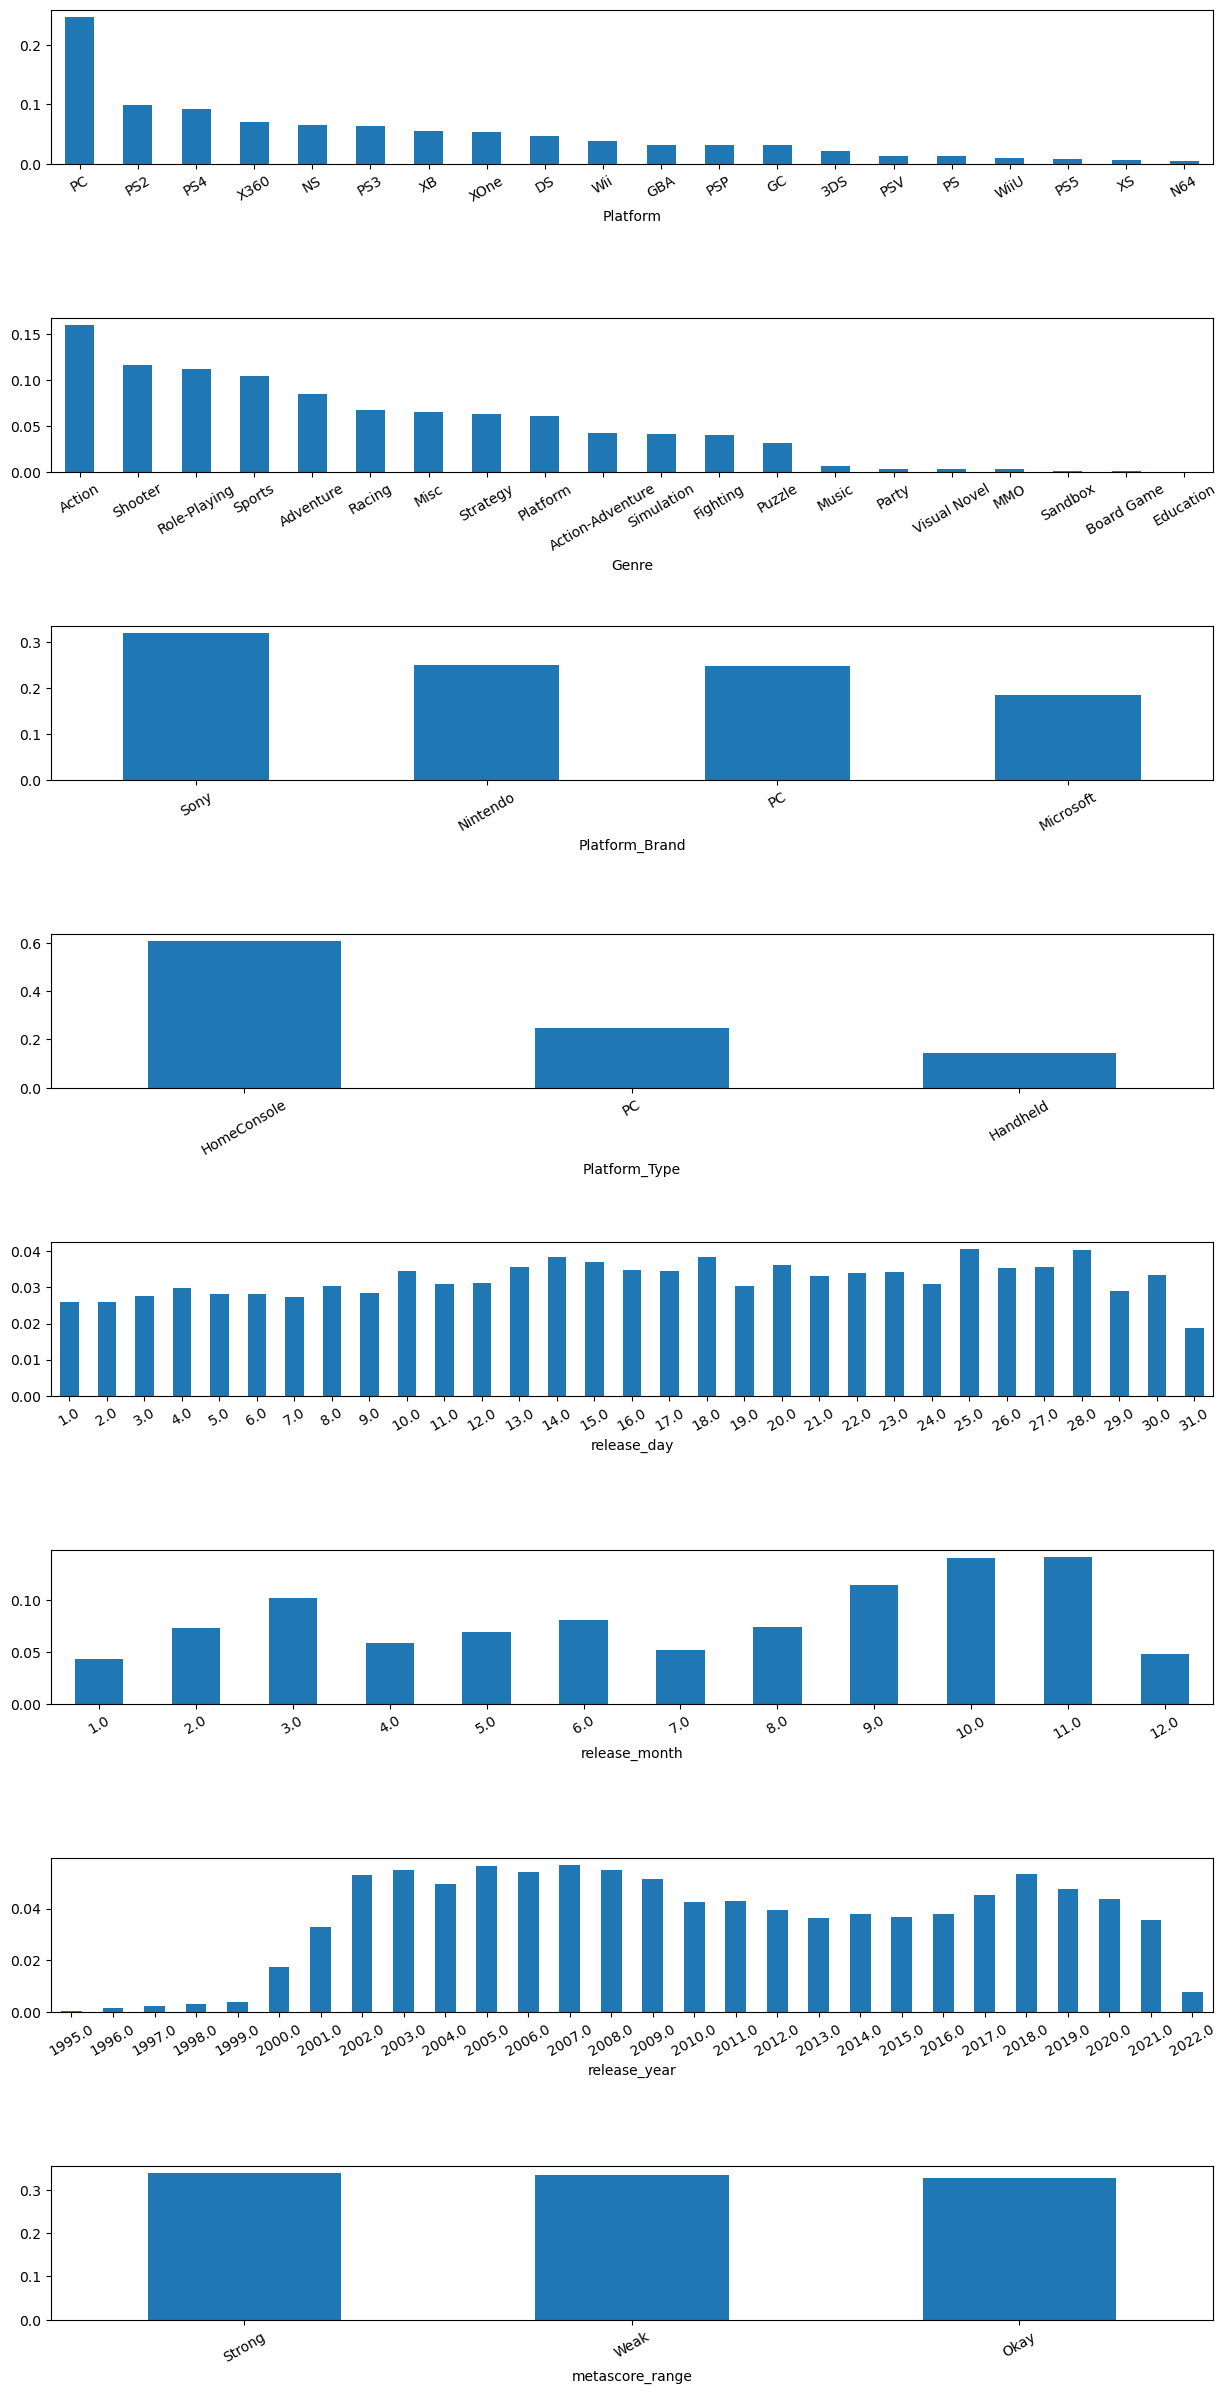

In [276]:
plt.subplots(8,1, figsize=(15,30))

pos = 1

for col in clean_df:

    if clean_df[col].nunique() < 50:
        plt.subplot(8,1, pos)
        if (col == 'release_day') or (col == 'release_year') or (col == 'release_month'):
            sorted_data = clean_df[col].value_counts(normalize=True).sort_index()

            sorted_data.plot(kind="bar")

        else:
            clean_df[col].value_counts(normalize=True).plot(kind="bar")
        pos += 1
        plt.xticks(rotation=30)
        
        
plt.subplots_adjust(hspace=1)
plt.subplots_adjust(wspace=1)


plt.show()

For the other columns, there is too much data to be able to plot it.
I will use Vectorizing for those columns.

But for no

In [401]:
# exporting to csv when needed


# merged_df.to_csv('clean_data_1.5.csv')

In [402]:
# merged_df = pd.read_csv('clean_data_1.5.csv', index_col=None, header=0)

In [403]:
merged_df.head(5)

,Unnamed: 0,Name,Platform,Publisher,Developer,Genre,Platform_Brand,Platform_Type,metascore,release_day,release_month,release_year,Story Focus,Gameplay Focus,metascore_range
0,0,Wii Sports,Wii,Nintendo,Nintendo EAD,Sports,Nintendo,HomeConsole,76.0,19.0,11.0,2006.0,0.0,1.0,Okay
1,1,Mario Kart 8 Deluxe,NS,Nintendo,Nintendo EPD,Racing,Nintendo,HomeConsole,92.0,28.0,4.0,2017.0,NaN,NaN,Strong
2,2,Team Fortress 2,PC,Valve,Valve Corporation,Shooter,PC,PC,92.0,10.0,10.0,2007.0,NaN,NaN,Strong
3,3,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,Shooter,PC,PC,83.0,21.0,8.0,2012.0,NaN,NaN,Strong
4,4,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,Shooter,PC,PC,79.0,23.0,10.0,2015.0,NaN,NaN,Strong


<div id="heading--3"/>
    
# Next Steps

### As soon as possible:
    
    1. More cleaning of the dataset
    2. Trying to find a dataset to complement the sales number
    3. Filling the data on my own, to be able to make the predictions more accurate.

### In the next few weeks:

    4. Trying multiple types of regression models
    5. Finding the best model for the current situation
    6. Training the model for maximum efficiency
    7. Export a clean dataframe/CSV on Kaggle for other users
    8. Hosting the project on a website for easy utilization

In [404]:
# making a version without focuses
# merged_df.drop(['Story Focus', 'Gameplay Focus', 'metascore'], axis=1, inplace=True)


merged_df.drop(['metascore'], axis=1, inplace=True)
# merged_df.dropna(subset=['Story Focus'], inplace=True)


# merged_df.drop(['Index'], axis=1, inplace=True)
merged_df.drop(['Name'], axis=1, inplace=True)
merged_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [405]:
# making a version without publishers/devs

# merged_df.drop(['Developer', 'Publisher'], axis=1, inplace=True)
# merged_df.drop(['DevSize', 'PublisherSize'], axis=1, inplace=True)

merged_df.drop(['Platform'], axis=1, inplace=True)
merged_df.drop(['Story Focus', 'Gameplay Focus'], axis=1, inplace=True)

# merged_df.drop(['PubOccurences', 'DevOccurences'], axis=1, inplace=True)

# merged_df.drop(['release_day', 'release_month', 'release_year'], axis=1, inplace=True)

In [406]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12538 entries, 0 to 12537
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Publisher        12538 non-null  object 
 1   Developer        12538 non-null  object 
 2   Genre            12538 non-null  object 
 3   Platform_Brand   12538 non-null  object 
 4   Platform_Type    12538 non-null  object 
 5   release_day      12538 non-null  float64
 6   release_month    12538 non-null  float64
 7   release_year     12538 non-null  float64
 8   metascore_range  12538 non-null  object 
dtypes: float64(3), object(6)
memory usage: 881.7+ KB


In [407]:
# contingency_table = pd.crosstab(merged_df['Publisher'], merged_df['metascore_range'])
# chi2, p, dof, expected = chi2_contingency(contingency_table)
# results[feature] = {'Chi-Squared': chi2, 'p-value': p, 'dof' : dof}

# print(results)
# chi2_contingency(contingency_table)
# contingency_table

In [408]:
target_variable = 'metascore_range'

# Perform chi-squared test for each feature
results = {}
for feature in merged_df.columns:
    if feature != target_variable:
        contingency_table = pd.crosstab(merged_df[feature], merged_df[target_variable])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        results[feature] = {'Chi-Squared': chi2, 'p-value': p, 'dof' : dof}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                Chi-Squared        p-value     dof
Publisher       3845.875843  3.429174e-148  1812.0
Developer       9856.405071  3.131192e-261  5428.0
Genre            407.869247   1.724733e-63    38.0
Platform_Brand   137.183372   3.937165e-27     6.0
Platform_Type    174.879117   9.378400e-37     4.0
release_day      105.874428   2.389688e-04    60.0
release_month     84.287264   3.151831e-09    22.0
release_year     546.623763   1.238485e-82    54.0


In [409]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12538 entries, 0 to 12537
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Publisher        12538 non-null  object 
 1   Developer        12538 non-null  object 
 2   Genre            12538 non-null  object 
 3   Platform_Brand   12538 non-null  object 
 4   Platform_Type    12538 non-null  object 
 5   release_day      12538 non-null  float64
 6   release_month    12538 non-null  float64
 7   release_year     12538 non-null  float64
 8   metascore_range  12538 non-null  object 
dtypes: float64(3), object(6)
memory usage: 881.7+ KB


In [410]:
df_numerical = merged_df.copy()
df_numerical.select_dtypes('object').columns
df_numerical.drop(['metascore_range'], axis=1, inplace=True)
df_dummy = pd.get_dummies(df_numerical, dtype=np.int32 )
df_dummy['metascore_range'] = merged_df['metascore_range']


# df_numerical = merged_df.copy()
# df_numerical.select_dtypes('object').columns
# df_numerical.drop(['Name', 'userscore', 'critic_reviews', 'metascore',
#                   'user_reviews', 'score', 'opencritic_classification',
#                    'esrb_rating', 'global_sales_range'], axis=1, inplace=True)
# df_dummy = pd.get_dummies(df_numerical, dtype=np.int32 )
# df_dummy['global_sales_range'] = merged_df['global_sales_range']

In [411]:
df_numerical

,Publisher,Developer,Genre,Platform_Brand,Platform_Type,release_day,release_month,release_year
0,Nintendo,Nintendo EAD,Sports,Nintendo,HomeConsole,19.0,11.0,2006.0
1,Nintendo,Nintendo EPD,Racing,Nintendo,HomeConsole,28.0,4.0,2017.0
2,Valve,Valve Corporation,Shooter,PC,PC,10.0,10.0,2007.0
3,Valve,Valve Corporation,Shooter,PC,PC,21.0,8.0,2012.0
4,Valve,Valve Corporation,Shooter,PC,PC,23.0,10.0,2015.0
...,...,...,...,...,...,...,...,...
12533,Zen Studios,Unknown,Misc,Nintendo,Handheld,28.0,6.0,2012.0
12534,Zen Studios,Zen Studios,Sports,Nintendo,HomeConsole,3.0,8.0,2017.0
12535,Zen Studios,Zen Studios,Sports,Sony,HomeConsole,25.0,7.0,2017.0
12536,Zombie Cow Studios,Zombie Cow Studios,Adventure,PC,PC,2.0,7.0,2009.0


In [412]:
df_dummy.head()

,release_day,release_month,release_year,Publisher_04-Aug,Publisher_10TACLE Studios,Publisher_10tons Ltd,Publisher_11 bit studios,Publisher_17-Bit,Publisher_1C Company,Publisher_2Awesome Studio,...,Genre_Strategy,Genre_Visual Novel,Platform_Brand_Microsoft,Platform_Brand_Nintendo,Platform_Brand_PC,Platform_Brand_Sony,Platform_Type_Handheld,Platform_Type_HomeConsole,Platform_Type_PC,metascore_range
0,19.0,11.0,2006.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,Okay
1,28.0,4.0,2017.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,Strong
2,10.0,10.0,2007.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,Strong
3,21.0,8.0,2012.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,Strong
4,23.0,10.0,2015.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,Strong


In [413]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12538 entries, 0 to 12537
Columns: 3653 entries, release_day to metascore_range
dtypes: float64(3), int32(3649), object(1)
memory usage: 174.9+ MB


In [414]:
df_dummy.isna().sum().sum()

0

In [415]:
# Way too many columns. Which column is making so many dummy columns?
# Let's check

for column in df_numerical:
    print(f'The column {column} has {df_numerical[column].nunique()} unique values')


The column Publisher has 907 unique values
The column Developer has 2715 unique values
The column Genre has 20 unique values
The column Platform_Brand has 4 unique values
The column Platform_Type has 3 unique values
The column release_day has 31 unique values
The column release_month has 12 unique values
The column release_year has 28 unique values


In [416]:
# The first time I ran this, here is what I got:

# The column Platform has 21 unique values
# The column Publisher has 914 unique values
# The column Developer has 2725 unique values
# The column Global_Sales has 619 unique values
# The column Genre has 20 unique values
# The column Platform_Brand has 4 unique values
# The column Platform_Type has 3 unique values
# The column release_date has 3729 unique values
# The column esrb_rating has 7 unique values
# The column metascore has 82 unique values
# The column userscore has 90 unique values
# The column critic_reviews has 114 unique values
# The column user_reviews has 1339 unique values
# The column num_players has 331 unique values
# The column Story Focus has 2 unique values
# The column Gameplay Focus has 2 unique values
# The column Series has 2 unique values
# The column BrandedName has 1 unique values
# The column score has 73 unique values
# The column opencritic_classification has 4 unique values

# I will check the publisher and developers the most.
# I should also check num_players

In [417]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier


In [419]:
# first test ever

X = df_dummy.drop(columns="metascore_range")
y = df_dummy["metascore_range"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)



# 1. Instantiate model
videogames_logit = HistGradientBoostingClassifier()

# 2. Fit model
videogames_logit.fit(X_train, y_train);


print(f'Score on train: {videogames_logit.score(X_train, y_train)}')
print(f'Score on test: {videogames_logit.score(X_test, y_test)}')

Score on train: 0.7396713989472005
Score on test: 0.4935396394959324


In [420]:
# # first test ever

X = df_dummy.drop(columns="metascore_range")
y = df_dummy["metascore_range"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)



# 1. Instantiate model
videogames_logit = RandomForestClassifier(max_depth = 5, max_features = 1000)

# 2. Fit model
videogames_logit.fit(X_train, y_train);


print(f'Score on train: {videogames_logit.score(X_train, y_train)}')
print(f'Score on test: {videogames_logit.score(X_test, y_test)}')

Score on train: 0.478704737597703
Score on test: 0.4287765193810815


In [421]:
# first test ever

X = df_dummy.drop(columns="metascore_range")
y = df_dummy["metascore_range"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)



# 1. Instantiate model
videogames_logit = AdaBoostClassifier(n_estimators=20)

# 2. Fit model
videogames_logit.fit(X_train, y_train);


print(f'Score on train: {videogames_logit.score(X_train, y_train)}')
print(f'Score on test: {videogames_logit.score(X_test, y_test)}')

Score on train: 0.447926162260711
Score on test: 0.44072301967038807


In [422]:
# first test ever

X = df_dummy.drop(columns="metascore_range")
y = df_dummy["metascore_range"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)



# 1. Instantiate model
videogames_logit = BaggingClassifier()

# 2. Fit model
myregression_results = videogames_logit.fit(X_train, y_train);

print(myregression_results.get_params())


print(f'Score on train: {videogames_logit.score(X_train, y_train)}')
print(f'Score on test: {videogames_logit.score(X_test, y_test)}')

{'base_estimator': 'deprecated', 'bootstrap': True, 'bootstrap_features': False, 'estimator': None, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Score on train: 0.9794225554314883
Score on test: 0.4988036369436912


In [423]:
from sklearn.preprocessing import StandardScaler

x = df_dummy.drop(columns="metascore_range")
y = df_dummy["metascore_range"]

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)


my_logreg_model =BaggingClassifier().fit(X_train, y_train)

scaler = StandardScaler()
scaler.fit(X_train)  #NOTICE THAT WE DON"T EVEN FIT the scaler on our TEST DATA!
X_scaled_train = scaler.transform(X_train)

X_scaled_test = scaler.transform(X_test)

my_logreg_model_scaled = BaggingClassifier().fit(X_scaled_train, y_train)

print(my_logreg_model.score(X_test,y_test))
print(my_logreg_model_scaled.score(X_scaled_test,y_test))

0.5462519936204147
0.5283094098883573


In [424]:
#test:

X = df_dummy.drop(columns="metascore_range")
y = df_dummy["metascore_range"]

y.value_counts()

metascore_range
Strong    4247
Weak      4189
Okay      4102
Name: count, dtype: int64

In [425]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

credit_logit = LogisticRegression(solver='lbfgs', random_state=1, max_iter=10000)

# 2. Fit model
credit_logit.fit(X_train, y_train)

print(f'Score on train: {credit_logit.score(X_train, y_train)}')
print(f'Score on test: {credit_logit.score(X_test, y_test)}')

Score on train: 0.6457383773928898
Score on test: 0.5345560871876661


In [428]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



In [429]:
# Get class predictions
y_pred = credit_logit.predict(X_test)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predict 1", "2", "3"],
    index=["True 1", "2", "3"]
)

display(cf_df)

,Predict 1,2,3
True 1,496,376,375
2,286,819,182
3,309,223,696


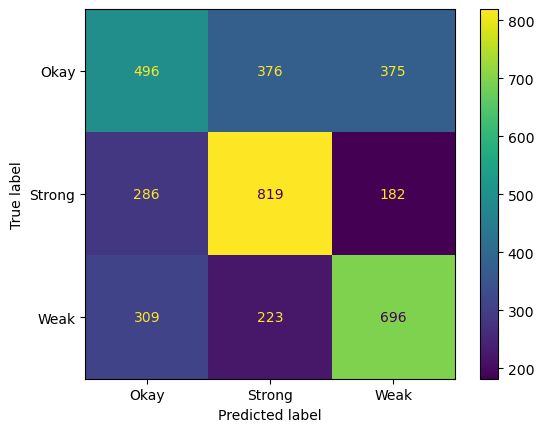

In [430]:
ConfusionMatrixDisplay.from_estimator(credit_logit, X_test, y_test)

In [431]:
display(cf_df)

,Predict 1,2,3
True 1,496,376,375
2,286,819,182
3,309,223,696


In [432]:
tp = cf_matrix[2, 2]
predicted_fraud = cf_matrix[:, 2].sum()

precision = tp/predicted_fraud

print(f"Precision = {tp}/{predicted_fraud} = {round(precision*100, 2)}%")

Precision = 696/1253 = 55.55%


In [433]:
tp = cf_matrix[1, 1]
true_fraud = cf_matrix[1, :].sum()

recall = tp/true_fraud

print(f"Recall = {tp}/{true_fraud} = {round(recall*100, 2)}%")

Recall = 819/1287 = 63.64%


In [434]:

# from sklearn.feature_selection import RFECV



# X = df_dummy.drop(columns="metascore_range")
# y = df_dummy["metascore_range"]

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Create a logistic regression classifier
# clf = RandomForestClassifier()

# # Create RFE with cross-validation
# rfecv = RFECV(estimator=clf, step=1, cv=5, scoring='accuracy')

# # Fit RFE to training data
# rfecv.fit(X_train, y_train)

# # Get selected features
# selected_features = np.where(rfecv.support_ == True)[0]

# # Print selected features
# print("Selected Features:")
# for feature_idx in selected_features:
#     print(f"Feature {feature_idx + 1}")

# # Plot number of features vs. cross-validation scores
# import matplotlib.pyplot as plt
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross-validation score (accuracy)")
# plt.plot(range(1, len(rfecv.cv_results_["mean_test_score"]) + 1), rfecv.cv_results_["mean_test_score"])
# plt.show()

In [435]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [437]:
# X = df_dummy.drop(columns="metascore_range")
# y = df_dummy["metascore_range"]

# i = 0.1

# while i < 0.95:
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i)



#     # 1. Instantiate model
#     videogames_logit = GradientBoostingClassifier()

#     # 2. Fit model
#     videogames_logit.fit(X_train, y_train);


#     print(f'i is currently {i}')
#     print(f'Score on train: {videogames_logit.score(X_train, y_train)}')
#     print(f'Score on test: {videogames_logit.score(X_test, y_test)}')
#     i += 0.1

In [438]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [439]:
X = df_dummy.drop(columns="metascore_range")
y = df_dummy["metascore_range"]

i = 0.1

while i < 0.95:

    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = i)

    # 1. Instantiate model
    videogames_logit = xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(y_encoded)))

    # 2. Fit model
    videogames_logit.fit(X_train, y_train);

    print(f'i is currently {i}')
    print(f'Score on train: {videogames_logit.score(X_train, y_train)}')
    print(f'Score on test: {videogames_logit.score(X_test, y_test)}')
    i += 0.1
    

i is currently 0.1
Score on train: 0.6489719957461892
Score on test: 0.5374800637958532
i is currently 0.2
Score on train: 0.6571286141575274
Score on test: 0.5446570972886763
i is currently 0.30000000000000004
Score on train: 0.6700091157702825
Score on test: 0.5358851674641149
i is currently 0.4
Score on train: 0.6785429407072587
Score on test: 0.52811004784689
i is currently 0.5
Score on train: 0.6769819747966183
Score on test: 0.5157122348061892
i is currently 0.6
Score on train: 0.6975074775672981
Score on test: 0.5130931809118703
i is currently 0.7
Score on train: 0.7170965168838075
Score on test: 0.49003076221943714
i is currently 0.7999999999999999
Score on train: 0.751495811727164
Score on test: 0.474728342139368
i is currently 0.8999999999999999
Score on train: 0.8786911412609737
Score on test: 0.43393885688967654


In [440]:
X = df_dummy.drop(columns="metascore_range")
y = df_dummy["metascore_range"]


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
    
    
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.33, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)

y_pred = xgbc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.37      0.41      1369
           1       0.56      0.61      0.59      1378
           2       0.55      0.62      0.58      1391

    accuracy                           0.53      4138
   macro avg       0.53      0.53      0.53      4138
weighted avg       0.53      0.53      0.53      4138



In [442]:
X = df_dummy.drop(columns="metascore_range")
y = df_dummy["metascore_range"]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split( X, y_encoded,
                                                    test_size=0.4, stratify = y_encoded)

xgb_model = XGBClassifier()
ab_model = AdaBoostClassifier()
rf_model = RandomForestClassifier()
nn_model = MLPClassifier(hidden_layer_sizes=(5,5,5,5))

xgb_model.fit(X_train, y_train)
ab_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
nn_model.fit(X_train, y_train)

print("Test Set Scores:")
print(f"AdaBoost score: {ab_model.score(X_test, y_test)}")
print(f"Random Forest score: {rf_model.score(X_test, y_test)}")
print(f"XG Boost score: {xgb_model.score(X_test, y_test)}")
print(f"NN Boost score: {nn_model.score(X_test, y_test)}")

Test Set Scores:
AdaBoost score: 0.4728867623604466
Random Forest score: 0.543859649122807
XG Boost score: 0.5330940988835726
NN Boost score: 0.3387161084529506
